1.loading lib and data

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

print("Steam + Twitch Game Success Prediction EDA")
print("-"*50)

# load cleaned data
df = pd.read_csv('../Data/steam_twitch_final_cleaned.csv')

print(f"\nDataSize: {df.shape}")
print(f"Features numbers: {df.shape[1] - 2}")  # Name and Success
print(f"Game numbers: {df.shape[0]}")

# show head lines
print("\nPreview of data:")
print(df.head())

Steam + Twitch Game Success Prediction EDA
--------------------------------------------------

DataSize: (1189, 18)
Features numbers: 16
Game numbers: 1189

Preview of data:
                  Name  Price  positive_ratio  total_reviews  Achievements  \
0      Forza Horizon 4  59.99        0.890325         137634           178   
1  Oxygen Not Included  24.99        0.964919          85916            45   
2   DYNASTY WARRIORS 9  44.99        0.338507           9084            44   
3               DEVOUR   3.99        0.918576          45097            74   
4        Silver Chains  24.99        0.740741            567            16   

   Metacritic_score  platform_count  is_free  Average_playtime_forever  \
0                80               1        0                      2518   
1                86               3        0                      3574   
2                80               1        0                       215   
3                80               2        0                 

2. data overview

In [9]:


print("1. data information")
print("-"*50)

print("\ndata types:")
print(df.dtypes)

print("\nNumerical Feature Statistical Summary:")
numeric_cols = df.select_dtypes(include=[np.number]).columns
print(df[numeric_cols].describe())


missing = df.isnull().sum()
if missing.sum() == 0:
    print("\n no missing value")
else:
    print(f"\nmissing values:")
    print(missing[missing > 0])

1. data information
--------------------------------------------------

data types:
Name                         object
Price                       float64
positive_ratio              float64
total_reviews                 int64
Achievements                  int64
Metacritic_score              int64
platform_count                int64
is_free                       int64
Average_playtime_forever      int64
Peak_CCU                      int64
Hours_watched                 int64
Avg_viewers                 float64
Peak_viewers                  int64
Streamers                     int64
watch_per_stream_hour       float64
streaming_popularity        float64
community_engagement        float64
success                       int64
dtype: object

Numerical Feature Statistical Summary:
             Price  positive_ratio  total_reviews  Achievements  \
count  1189.000000     1189.000000   1.189000e+03   1189.000000   
mean     22.478209        0.823447   4.513562e+04     46.396972   
std      17.2

3.Target Variable Analysis

2.Target Variable Analysis
--------------------------------------------------

target Distribution:
  fail games (0): 597 (50.2%)
  success games (1): 592 (49.8%)


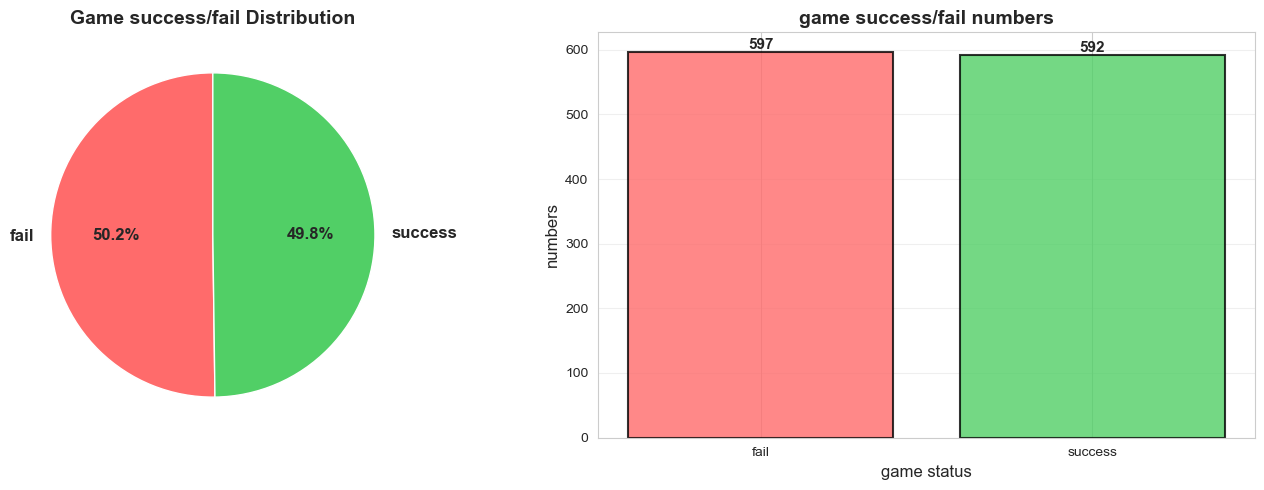


 saved: target_distribution.png


In [10]:


print("2.Target Variable Analysis")
print("-"*50)


success_counts = df['success'].value_counts()
print(f"\ntarget Distribution:")
print(f"  fail games (0): {success_counts[0]} ({success_counts[0]/len(df)*100:.1f}%)")
print(f"  success games (1): {success_counts[1]} ({success_counts[1]/len(df)*100:.1f}%)")

# visual
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Pie Chart
colors = ['#ff6b6b', '#51cf66']
axes[0].pie(success_counts, labels=['fail', 'success'], autopct='%1.1f%%',
            startangle=90, colors=colors, textprops={'fontsize': 12, 'weight': 'bold'})
axes[0].set_title('Game success/fail Distribution', fontsize=14, fontweight='bold')

# Bar Chart
bars = axes[1].bar([0, 1], success_counts.values, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
axes[1].set_xlabel('game status', fontsize=12)
axes[1].set_ylabel('numbers', fontsize=12)
axes[1].set_title('game success/fail numbers', fontsize=14, fontweight='bold')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['fail', 'success'])
axes[1].grid(axis='y', alpha=0.3)

# set labels
for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n saved: target_distribution.png")

4.Numerical Feature Distribution

3.Numerical Feature Distribution
--------------------------------------------------


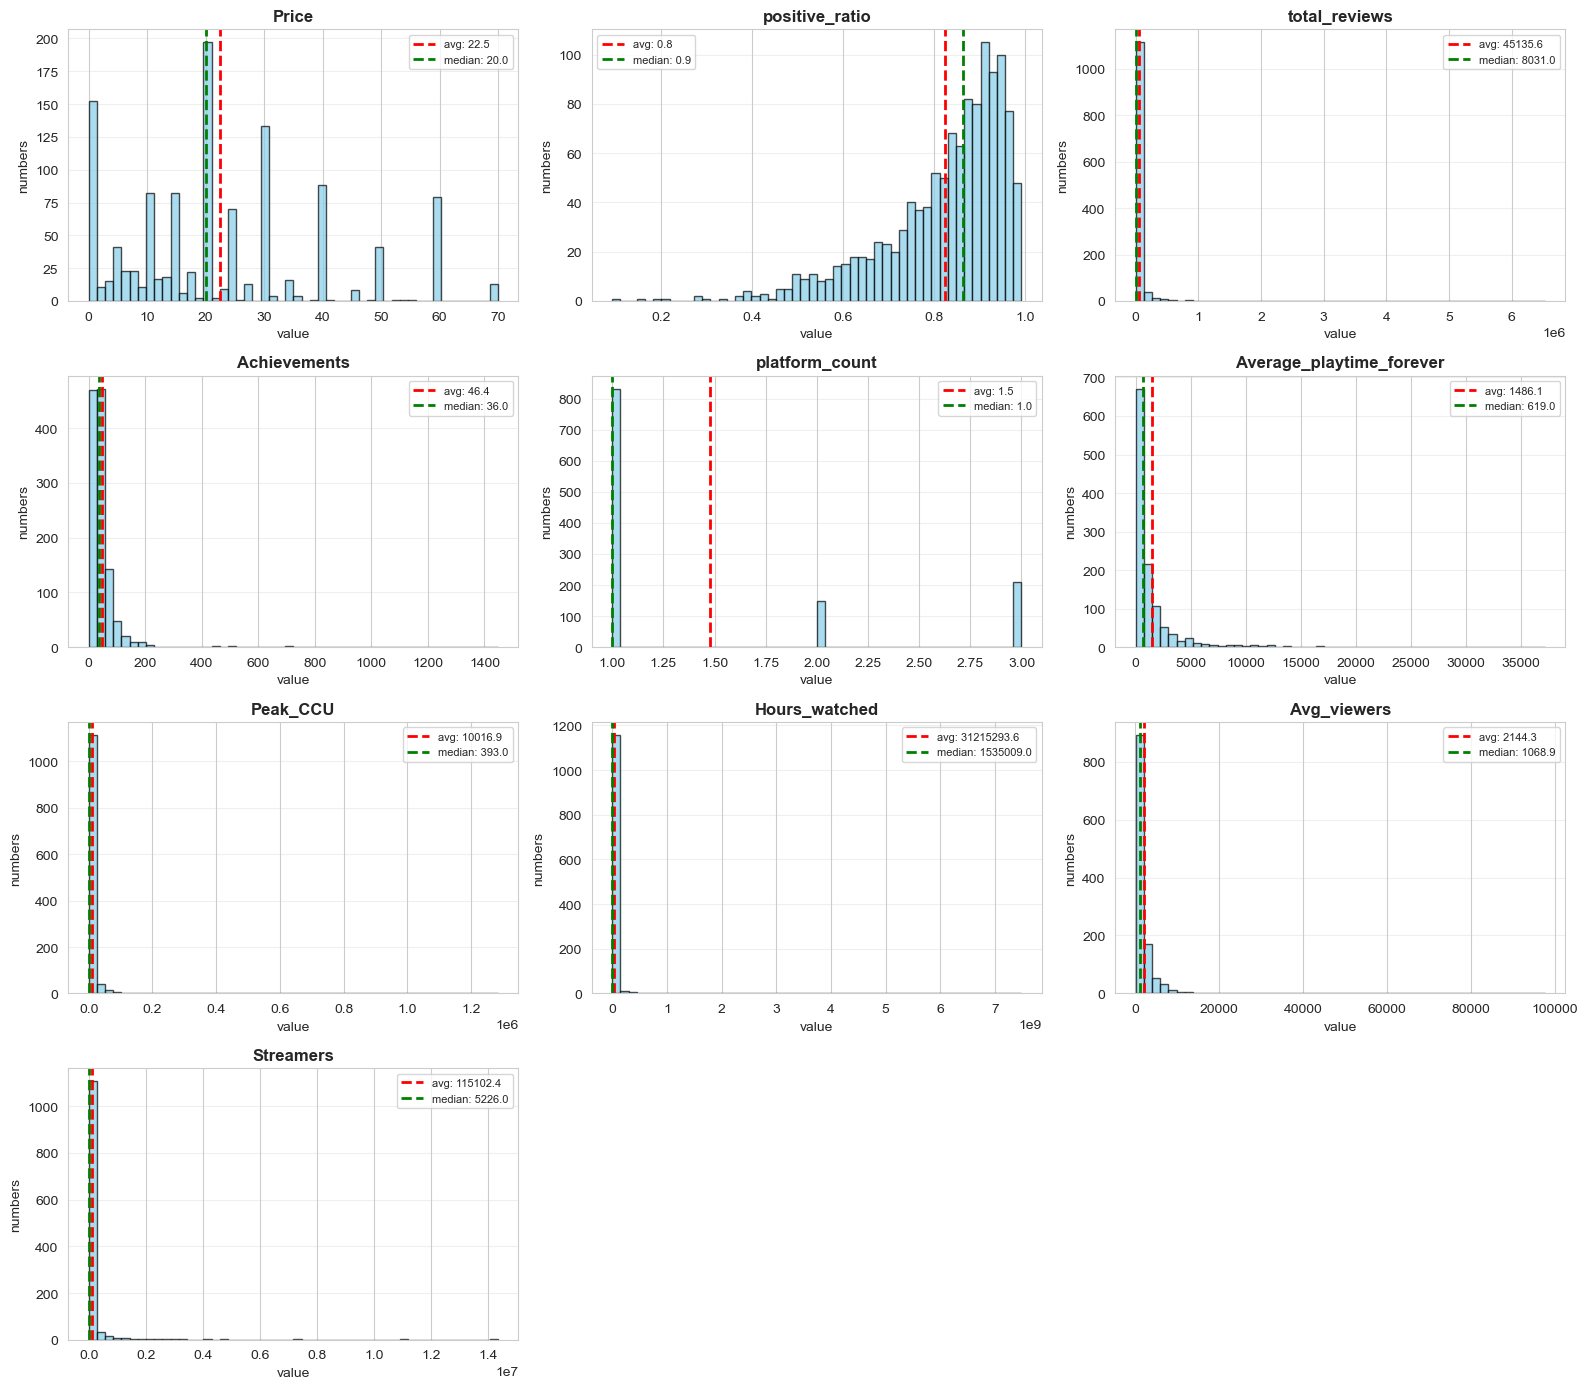


saved : feature_distributions.png


In [12]:

print("3.Numerical Feature Distribution")
print("-"*50)

# select features
key_features = [
    'Price', 'positive_ratio', 'total_reviews',
    'Achievements', 'platform_count', 'Average_playtime_forever',
    'Peak_CCU', 'Hours_watched', 'Avg_viewers', 'Streamers'
]

# Histogram
fig, axes = plt.subplots(4, 3, figsize=(16, 14))
axes = axes.ravel()

for idx, col in enumerate(key_features):
    if col in df.columns:
        data = df[col].dropna()

        axes[idx].hist(data, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'{col}', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel('value', fontsize=10)
        axes[idx].set_ylabel('numbers', fontsize=10)
        axes[idx].grid(axis='y', alpha=0.3)

        # Add statistical information
        mean_val = data.mean()
        median_val = data.median()
        axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'avg: {mean_val:.1f}')
        axes[idx].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'median: {median_val:.1f}')
        axes[idx].legend(fontsize=8)

# delete useless chart
for idx in range(len(key_features), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.savefig('feature_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nsaved : feature_distributions.png")

5. feature difference between success and fail games

4.feature difference between success and fail games
--------------------------------------------------


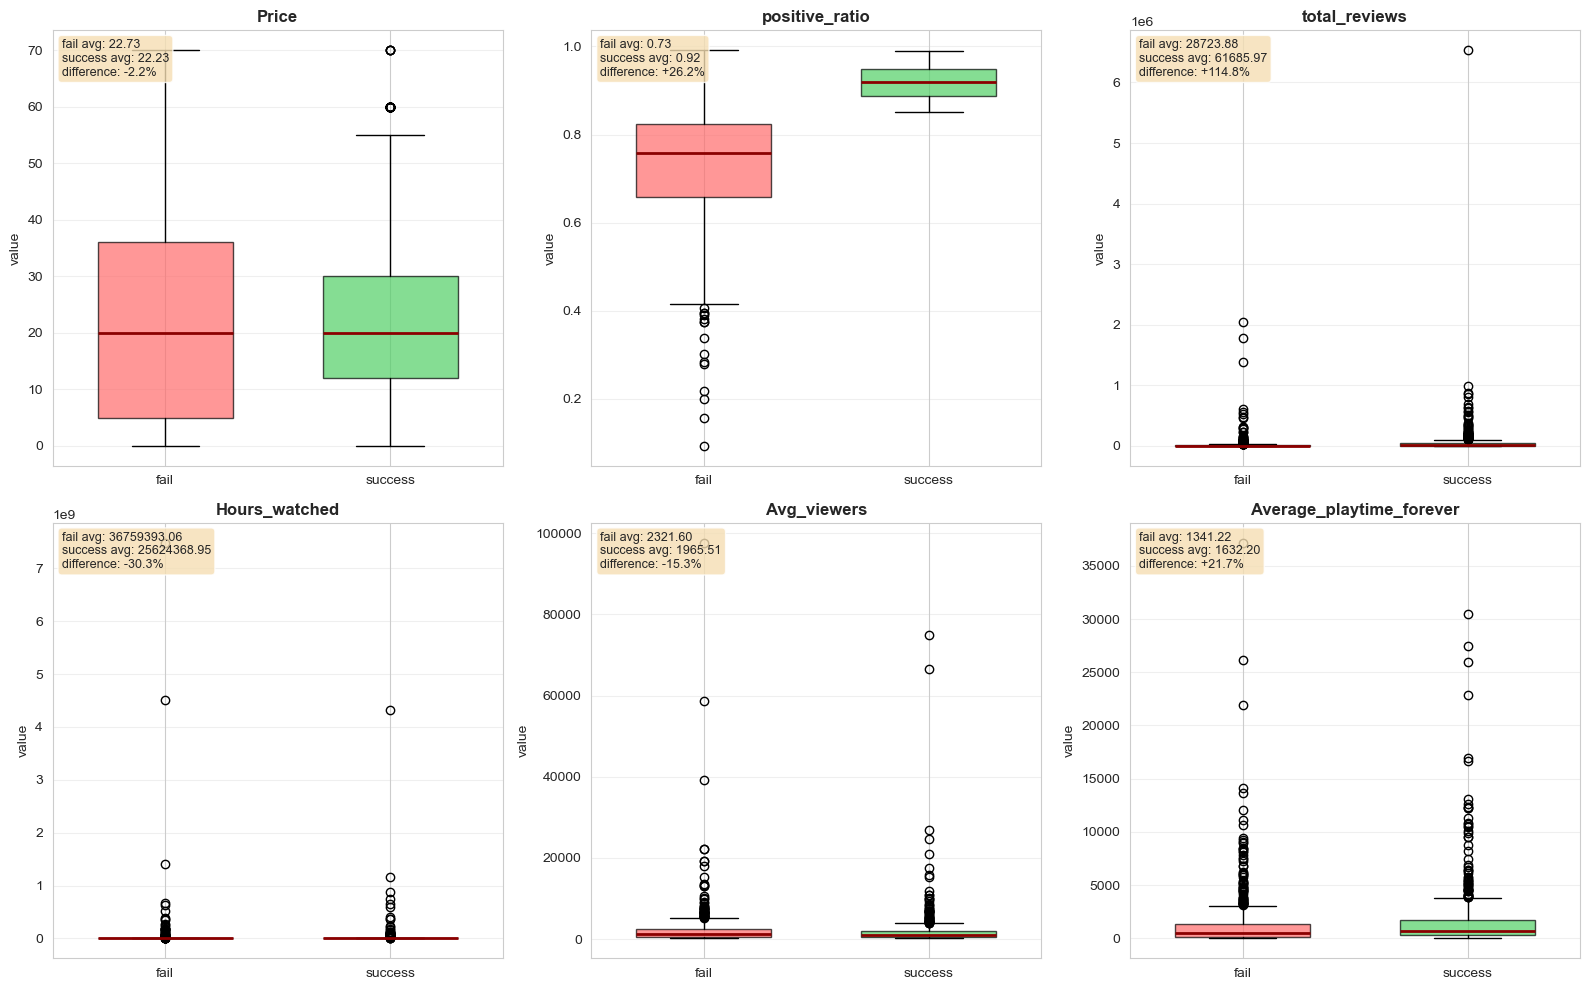


saved : success_vs_failure_comparison.png


In [14]:


print("4.feature difference between success and fail games")
print("-"*50)

# select key features
comparison_features = [
    'Price', 'positive_ratio', 'total_reviews',
    'Hours_watched', 'Avg_viewers', 'Average_playtime_forever'
]

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for idx, feature in enumerate(comparison_features):
    if feature in df.columns:
        # set group
        success = df[df['success'] == 1][feature].dropna()
        failure = df[df['success'] == 0][feature].dropna()

        # Box Plot
        data_to_plot = [failure, success]
        bp = axes[idx].boxplot(data_to_plot, labels=['fail', 'success'],
                                patch_artist=True,
                                widths=0.6)

        # set color
        for patch, color in zip(bp['boxes'], ['#ff6b6b', '#51cf66']):
            patch.set_facecolor(color)
            patch.set_alpha(0.7)

        for median in bp['medians']:
            median.set_color('darkred')
            median.set_linewidth(2)

        axes[idx].set_title(f'{feature}', fontsize=12, fontweight='bold')
        axes[idx].set_ylabel('value', fontsize=10)
        axes[idx].grid(axis='y', alpha=0.3)

        # show information
        mean_failure = failure.mean()
        mean_success = success.mean()
        diff_pct = ((mean_success - mean_failure) / mean_failure * 100) if mean_failure != 0 else 0

        info_text = f'fail avg: {mean_failure:.2f}\nsuccess avg: {mean_success:.2f}\ndifference: {diff_pct:+.1f}%'
        axes[idx].text(0.02, 0.98, info_text,
                      transform=axes[idx].transAxes,
                      verticalalignment='top',
                      bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
                      fontsize=9)

plt.tight_layout()
plt.savefig('success_vs_failure_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nsaved : success_vs_failure_comparison.png")


6. Feature Correlation Analysis

5. Correlation Analysis
--------------------------------------------------


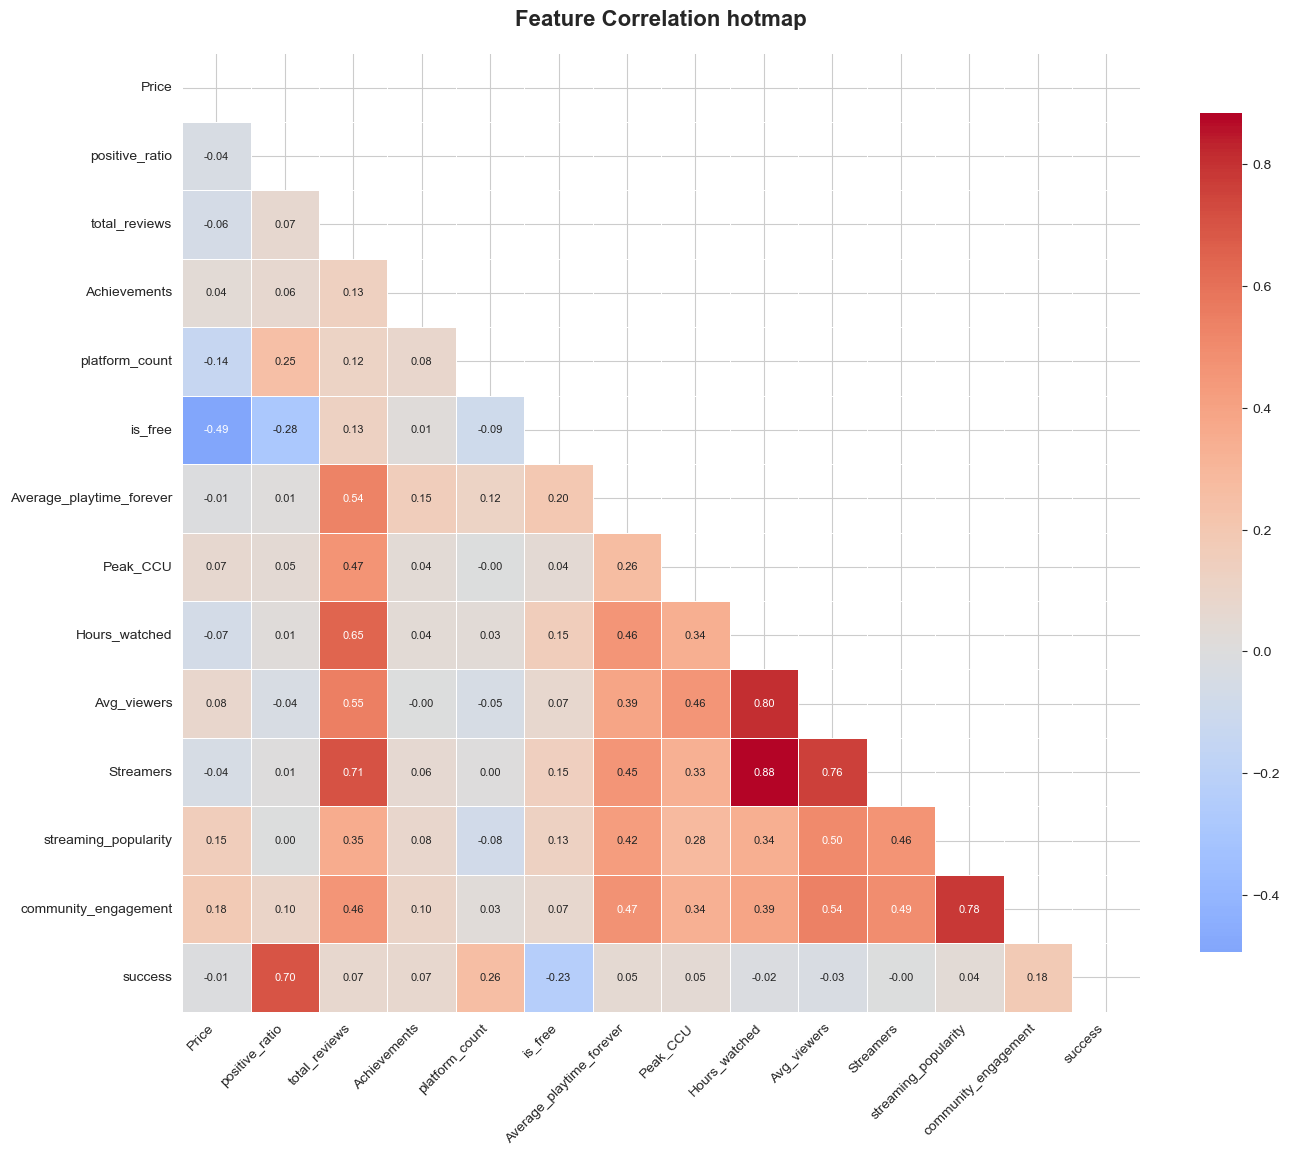


saved : correlation_heatmap.png

correlation sort:
positive_ratio              0.699735
platform_count              0.256450
community_engagement        0.179888
total_reviews               0.073002
Achievements                0.072570
Average_playtime_forever    0.050028
Peak_CCU                    0.046525
streaming_popularity        0.038945
Streamers                  -0.002738
Price                      -0.014478
Hours_watched              -0.019001
Avg_viewers                -0.034611
is_free                    -0.229580
Name: success, dtype: float64

Strong correlation (|r| > 0.1):
  positive_ratio: 0.700
  platform_count: 0.256
  community_engagement: 0.180
  is_free: -0.230


In [15]:
print("5. Correlation Analysis")
print("-"*50)

# select key features
correlation_features = [
    'Price', 'positive_ratio', 'total_reviews',
    'Achievements', 'platform_count', 'is_free',
    'Average_playtime_forever', 'Peak_CCU',
    'Hours_watched', 'Avg_viewers', 'Streamers',
    'streaming_popularity', 'community_engagement',
    'success'
]

# reserve exist features
available_corr_features = [f for f in correlation_features if f in df.columns]

# calculate
corr_matrix = df[available_corr_features].corr()

# draw picture
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=0.5,
            cbar_kws={"shrink": 0.8},
            annot_kws={"size": 8})
plt.title('Feature Correlation hotmap', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nsaved : correlation_heatmap.png")

print("\ncorrelation sort:")
target_corr = corr_matrix['success'].drop('success').sort_values(ascending=False)
print(target_corr)


strong_corr = target_corr[abs(target_corr) > 0.1]
print(f"\nStrong correlation (|r| > 0.1):")
for feature, corr_val in strong_corr.items():
    print(f"  {feature}: {corr_val:.3f}")

7. feature importance between steam and twitch

6. Steam vs Twitch features importance
--------------------------------------------------


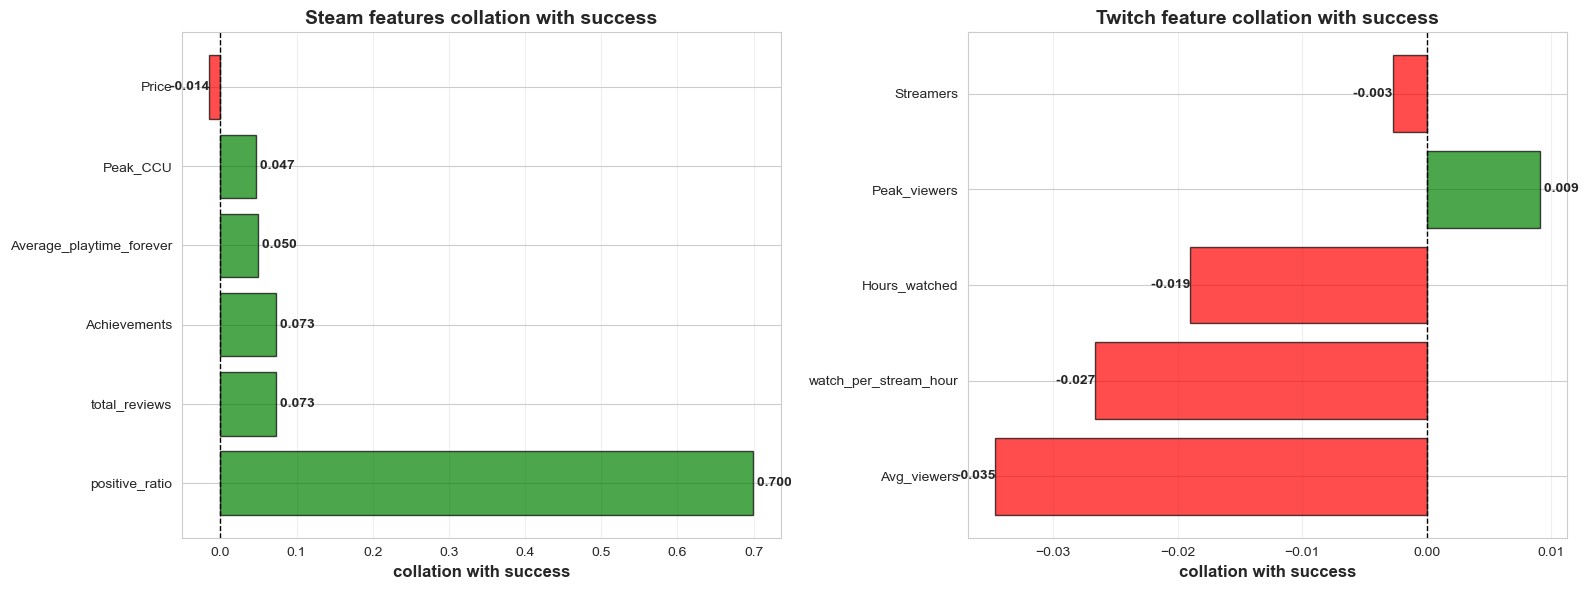


saved : steam_vs_twitch_correlation.png


In [16]:

print("6. Steam vs Twitch features importance")
print("-"*50)


# select features
steam_features = ['Price', 'positive_ratio', 'total_reviews',
                  'Achievements', 'Average_playtime_forever', 'Peak_CCU']

twitch_features = ['Hours_watched', 'Avg_viewers', 'Peak_viewers',
                   'Streamers', 'watch_per_stream_hour']

# calculate
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Steam features
steam_corr = []
for f in steam_features:
    if f in df.columns:
        corr_val = df[f].corr(df['success'])
        steam_corr.append((f, corr_val))

steam_corr = sorted(steam_corr, key=lambda x: abs(x[1]), reverse=True)
steam_names = [x[0] for x in steam_corr]
steam_values = [x[1] for x in steam_corr]

colors_steam = ['green' if v > 0 else 'red' for v in steam_values]
bars1 = ax1.barh(steam_names, steam_values, color=colors_steam, alpha=0.7, edgecolor='black')
ax1.set_xlabel('collation with success', fontsize=12, fontweight='bold')
ax1.set_title('Steam features collation with success', fontsize=14, fontweight='bold')
ax1.axvline(x=0, color='black', linestyle='--', linewidth=1)
ax1.grid(axis='x', alpha=0.3)

# set label
for bar, val in zip(bars1, steam_values):
    width = bar.get_width()
    ax1.text(width, bar.get_y() + bar.get_height()/2,
            f' {val:.3f}',
            ha='left' if width > 0 else 'right',
            va='center', fontsize=10, fontweight='bold')

# Twitch features
twitch_corr = []
for f in twitch_features:
    if f in df.columns:
        corr_val = df[f].corr(df['success'])
        twitch_corr.append((f, corr_val))

twitch_corr = sorted(twitch_corr, key=lambda x: abs(x[1]), reverse=True)
twitch_names = [x[0] for x in twitch_corr]
twitch_values = [x[1] for x in twitch_corr]

colors_twitch = ['green' if v > 0 else 'red' for v in twitch_values]
bars2 = ax2.barh(twitch_names, twitch_values, color=colors_twitch, alpha=0.7, edgecolor='black')
ax2.set_xlabel('collation with success', fontsize=12, fontweight='bold')
ax2.set_title('Twitch feature collation with success', fontsize=14, fontweight='bold')
ax2.axvline(x=0, color='black', linestyle='--', linewidth=1)
ax2.grid(axis='x', alpha=0.3)

# set label
for bar, val in zip(bars2, twitch_values):
    width = bar.get_width()
    ax2.text(width, bar.get_y() + bar.get_height()/2,
            f' {val:.3f}',
            ha='left' if width > 0 else 'right',
            va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('steam_vs_twitch_correlation.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nsaved : steam_vs_twitch_correlation.png")




Analyse：Why Twitch is Negative Correlation

1. Top 10 fail games with high twitch viewers:

Game                                | watch hours  | positive rates | raeson
--------------------------------------------------------------------------------
Grand Theft Auto V                  |   7482026514 |    0.85 | low positive rate low recommendations
Dota 2                              |   4503767707 |    0.83 | low positive rate low recommendations
Dead by Daylight                    |   1400273078 |    0.81 | low positive rate low recommendations
Lost Ark                            |    662177548 |    0.74 | low positive rate low recommendations
Destiny 2                           |    628984478 |    0.84 | low positive rate low recommendations
World of Tanks                      |    523647336 |    0.81 | low positive rate low recommendations
PUBG: BATTLEGROUNDS                 |    390251522 |    0.56 | low positive rate low recommendations
FIFA 22                             |    37

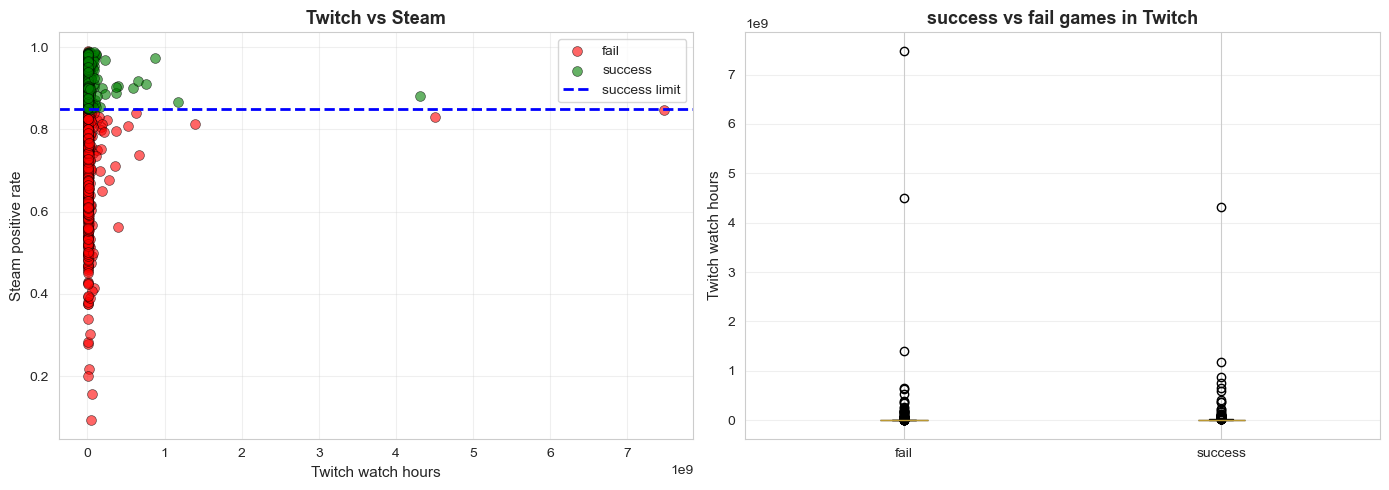


 saved: twitch_negative_correlation_analysis.png


In [20]:
# ===== Analyse：Why Twitch is Negative Correlation？=====

print("="*70)
print("Analyse：Why Twitch is Negative Correlation")
print("="*70)

# 1. Twitch value high but fail games
print("\n1. Top 10 fail games with high twitch viewers:")
high_twitch = df['Hours_watched'].quantile(0.75)
failed_but_popular = df[(df['Hours_watched'] > high_twitch) & 
                        (df['success'] == 0)].nlargest(10, 'Hours_watched')

print(f"\n{'Game':<35} | {'watch hours':<12} | {'positive rates':<8} | {'raeson'}")
print("-" * 80)
for _, row in failed_but_popular.iterrows():
    reason = ""
    if row['positive_ratio'] < 0.85:
        reason = "low positive rate"
    if row.get('Recommendations', 0) < 1000:
        reason += " low recommendations"
    
    print(f"{row['Name']:<35} | {row['Hours_watched']:>12.0f} | {row['positive_ratio']:>7.2f} | {reason}")

# 2. Twitch vs free game
print("\n2. Twitch vs free game:")
free_games = df[df['is_free']==1]
paid_games = df[df['is_free']==0]

print(f"free games:")
print(f"  avg watch hours: {free_games['Hours_watched'].mean():>15,.0f}")
print(f"  success rate: {free_games['success'].mean()*100:>23.1f}%")

print(f"\npaid games:")
print(f"  avg watch hours: {paid_games['Hours_watched'].mean():>15,.0f}")
print(f"  success rate: {paid_games['success'].mean()*100:>23.1f}%")

# 3. watch hours (success vs fail)
print("\n3. watch hours distribution:")
print(f"success games avg watch: {df[df['success']==1]['Hours_watched'].mean():>15,.0f}")
print(f"fail games avg watch: {df[df['success']==0]['Hours_watched'].mean():>15,.0f}")

# 4. collation
print("\n4. detailed collation:")
print(f"free games Twitch collation: {free_games['Hours_watched'].corr(free_games['success']):.3f}")
print(f"paid games Twitch collation: {paid_games['Hours_watched'].corr(paid_games['success']):.3f}")

# 5. visual
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# watch hours vs positive rate
ax1.scatter(df[df['success']==0]['Hours_watched'], 
           df[df['success']==0]['positive_ratio'],
           alpha=0.6, s=50, c='red', label='fail', edgecolors='black', linewidth=0.5)
ax1.scatter(df[df['success']==1]['Hours_watched'], 
           df[df['success']==1]['positive_ratio'],
           alpha=0.6, s=50, c='green', label='success', edgecolors='black', linewidth=0.5)
ax1.set_xlabel('Twitch watch hours', fontsize=11)
ax1.set_ylabel('Steam positive rate', fontsize=11)
ax1.set_title('Twitch vs Steam', fontsize=13, fontweight='bold')
ax1.axhline(y=0.85, color='blue', linestyle='--', linewidth=2, label='success limit')
ax1.legend()
ax1.grid(alpha=0.3)


ax2.boxplot([df[df['success']==0]['Hours_watched'],
             df[df['success']==1]['Hours_watched']],
            labels=['fail', 'success'],
            patch_artist=True,
            boxprops=dict(facecolor='lightblue', alpha=0.7))
ax2.set_ylabel('Twitch watch hours', fontsize=11)
ax2.set_title('success vs fail games in Twitch', fontsize=13, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('twitch_negative_correlation_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n saved: twitch_negative_correlation_analysis.png")


# This shows that free-to-play games consume a significant amount of streaming time, almost ten times that of paid games, but their success rate is extremely low. Therefore, free-to-play games are the main reason for the negative impact on Twitch data. Meanwhile, based on the top 10 games, it's easy to see that these games often have high entertainment value, such as chaotic environments (GTA), esports competitions (Dota), exciting gameplay (PUBG), and beautiful graphics, making them very suitable for streaming. However, their playability is often poor, unfriendly to beginners, with more cheaters, and requiring a lot of time, all of which frustrate players. If we define success as positive reviews and sales, then successful games are likely niche, high-quality titles, not suitable for streaming. For them, quality and reputation are more important than popularity and marketing.
#Therefore, for independent game developers, chasing livestream popularity is misleading; true success comes from game quality and community recommendations.


8. price analyse

7. price analyse
--------------------------------------------------


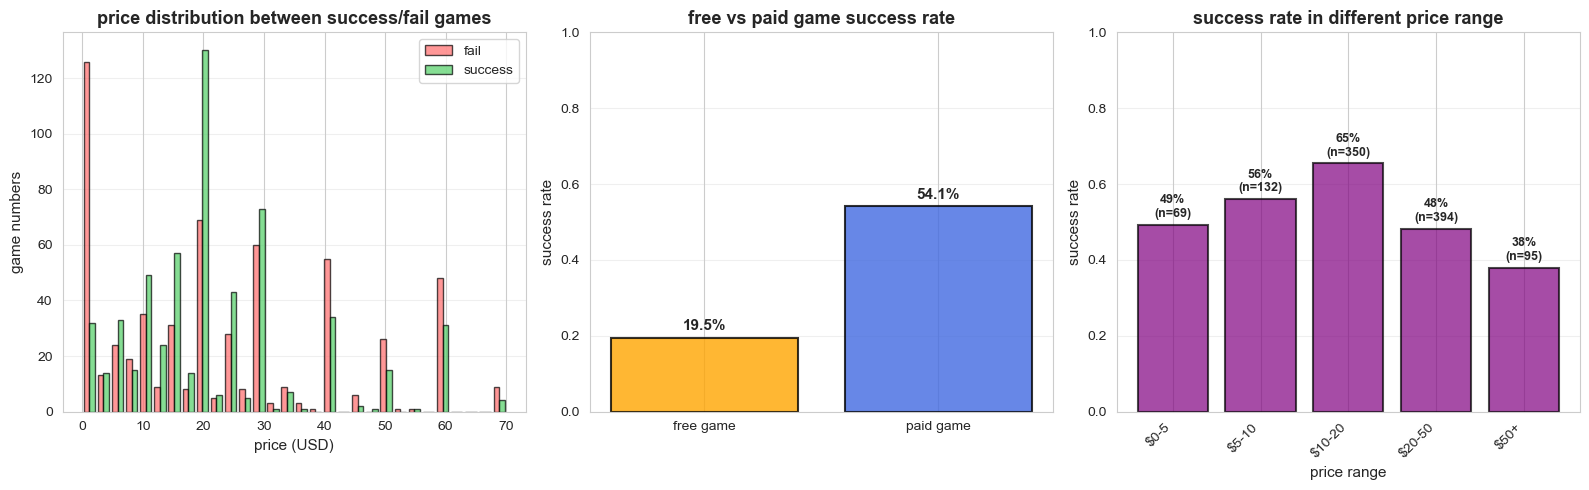


saved : price_analysis.png

Price statistics:
  Free game success rate: 19.5%
  Success rate of paid games: 54.1%
  Average price of success games: $22.23
  Average price of a fail game: $22.73


In [21]:


print("7. price analyse")
print("-"*50)

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# 1. price distribution
success_prices = df[df['success']==1]['Price']
failure_prices = df[df['success']==0]['Price']

axes[0].hist([failure_prices, success_prices],
             bins=30, label=['fail', 'success'],
             color=['#ff6b6b', '#51cf66'], alpha=0.7, edgecolor='black')
axes[0].set_xlabel('price (USD)', fontsize=11)
axes[0].set_ylabel('game numbers', fontsize=11)
axes[0].set_title('price distribution between success/fail games', fontsize=13, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(axis='y', alpha=0.3)

# 2. free vs paid games
free_success = df[df['is_free']==1]['success'].mean() if 'is_free' in df.columns else 0
paid_success = df[df['is_free']==0]['success'].mean() if 'is_free' in df.columns else 0

bars = axes[1].bar(['free game', 'paid game'], [free_success, paid_success],
                   color=['#ffa500', '#4169e1'], alpha=0.8, edgecolor='black', linewidth=1.5)
axes[1].set_ylabel('success rate', fontsize=11)
axes[1].set_title('free vs paid game success rate', fontsize=13, fontweight='bold')
axes[1].set_ylim(0, 1)
axes[1].grid(axis='y', alpha=0.3)

# set label
for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 0.02,
                f'{height*100:.1f}%',
                ha='center', fontsize=11, fontweight='bold')

# 3. divide price
price_bins = [0, 5, 10, 20, 50, 200]
df['price_bin'] = pd.cut(df['Price'], bins=price_bins, labels=['$0-5', '$5-10', '$10-20', '$20-50', '$50+'])

price_success = df.groupby('price_bin')['success'].agg(['mean', 'count'])
price_success = price_success[price_success['count'] >= 10]

bars = axes[2].bar(range(len(price_success)), price_success['mean'],
                   color='purple', alpha=0.7, edgecolor='black', linewidth=1.5)
axes[2].set_xticks(range(len(price_success)))
axes[2].set_xticklabels(price_success.index, rotation=45, ha='right')
axes[2].set_xlabel('price range', fontsize=11)
axes[2].set_ylabel('success rate', fontsize=11)
axes[2].set_title('success rate in different price range', fontsize=13, fontweight='bold')
axes[2].set_ylim(0, 1)
axes[2].grid(axis='y', alpha=0.3)

# set label and samples
for i, (bar, count) in enumerate(zip(bars, price_success['count'])):
    height = bar.get_height()
    axes[2].text(bar.get_x() + bar.get_width()/2., height + 0.02,
                f'{height*100:.0f}%\n(n={int(count)})',
                ha='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('price_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nsaved : price_analysis.png")

print(f"\nPrice statistics:")
print(f"  Free game success rate: {free_success*100:.1f}%")
print(f"  Success rate of paid games: {paid_success*100:.1f}%")
print(f"  Average price of success games: ${df[df['success']==1]['Price'].mean():.2f}")
print(f"  Average price of a fail game: ${df[df['success']==0]['Price'].mean():.2f}")

9. platforms influence

8. platforms influence
--------------------------------------------------


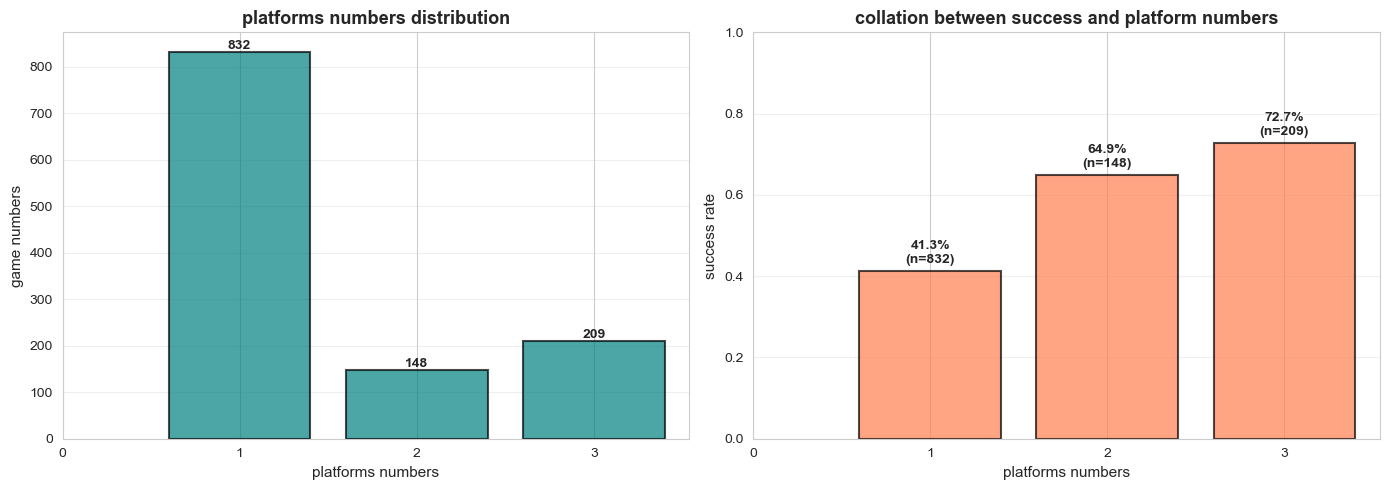


saved : platform_analysis.png

collation between success and platform numbers:
  1platforms: success rate 41.3% (samples: 832)
  2platforms: success rate 64.9% (samples: 148)
  3platforms: success rate 72.7% (samples: 209)


In [22]:



print("8. platforms influence")
print("-"*50)

if 'platform_count' in df.columns:
    # platforms influence
    platform_success = df.groupby('platform_count')['success'].agg(['mean', 'count'])

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # platforms numbers distribution
    platform_counts = df['platform_count'].value_counts().sort_index()
    bars1 = ax1.bar(platform_counts.index, platform_counts.values,
                    color='teal', alpha=0.7, edgecolor='black', linewidth=1.5)
    ax1.set_xlabel('platforms numbers', fontsize=11)
    ax1.set_ylabel('game numbers', fontsize=11)
    ax1.set_title('platforms numbers distribution', fontsize=13, fontweight='bold')
    ax1.set_xticks([0, 1, 2, 3])
    ax1.set_xticklabels(['0', '1', '2', '3'])
    ax1.grid(axis='y', alpha=0.3)

    # set label
    for bar in bars1:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom', fontsize=10, fontweight='bold')

    # collation between success and platform numbers
    bars2 = ax2.bar(platform_success.index, platform_success['mean'],
                    color='coral', alpha=0.7, edgecolor='black', linewidth=1.5)
    ax2.set_xlabel('platforms numbers', fontsize=11)
    ax2.set_ylabel('success rate', fontsize=11)
    ax2.set_title('collation between success and platform numbers', fontsize=13, fontweight='bold')
    ax2.set_xticks([0, 1, 2, 3])
    ax2.set_xticklabels(['0', '1', '2', '3'])
    ax2.set_ylim(0, 1)
    ax2.grid(axis='y', alpha=0.3)

    # set label
    for i, (bar, count) in enumerate(zip(bars2, platform_success['count'])):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                f'{height*100:.1f}%\n(n={int(count)})',
                ha='center', fontsize=10, fontweight='bold')

    plt.tight_layout()
    plt.savefig('platform_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("\nsaved : platform_analysis.png")

    print("\ncollation between success and platform numbers:")
    for idx, row in platform_success.iterrows():
        print(f"  {int(idx)}platforms: success rate {row['mean']*100:.1f}% (samples: {int(row['count'])})")

11. EDA summary

In [23]:
print("10. EDA summary")
print("-"*50)

# calculate key data
total_games = len(df)
success_count = df['success'].sum()
success_rate = df['success'].mean()

# feature collation
feature_corr = []
for col in df.columns:
    if col not in ['Name', 'success'] and df[col].dtype in ['int64', 'float64']:
        corr = df[col].corr(df['success'])
        feature_corr.append((col, corr))

feature_corr = sorted(feature_corr, key=lambda x: abs(x[1]), reverse=True)[:5]

# set report
report = f"""

EDA summary
{'-'*50}

1. data information:
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
   • Games numbers: {total_games:,}
   • Success games: {success_count} ({success_rate*100:.1f}%)
   • fail games: {total_games - success_count} ({(1-success_rate)*100:.1f}%)
   • balance : {'good ' if 0.4 <= success_rate <= 0.6 else 'bad'}

2. key feature to success (Top 5):
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
"""

for i, (feature, corr) in enumerate(feature_corr, 1):
    report += f"   {i}. {feature:<30} Correlation coefficient: {corr:>6.3f}\n"


report += f"""
3. success game vs fail game - major difference:
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

   Steam features:
   • positive rates:   success {df[df['success']==1]['positive_ratio'].mean():.2f} | fail {df[df['success']==0]['positive_ratio'].mean():.2f}
   • comments numbers:   success {df[df['success']==1]['total_reviews'].mean():.0f} | fail {df[df['success']==0]['total_reviews'].mean():.0f}
"""

if 'Average_playtime_forever' in df.columns:
    report += f"   • Game duration: success {df[df['success']==1]['Average_playtime_forever'].mean():.0f}min | fail {df[df['success']==0]['Average_playtime_forever'].mean():.0f}min\n"

report += f"""
   Twitch features:
   • watch duration: success {df[df['success']==1]['Hours_watched'].mean():.0f} | fail {df[df['success']==0]['Hours_watched'].mean():.0f}
   • avg viewer: success {df[df['success']==1]['Avg_viewers'].mean():.0f} | fail {df[df['success']==0]['Avg_viewers'].mean():.0f}

4. price:
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
"""

if 'is_free' in df.columns:
    free_succ = df[df['is_free']==1]['success'].mean()
    paid_succ = df[df['is_free']==0]['success'].mean()
    report += f"   • free game success rate: {free_succ*100:.1f}%\n"
    report += f"   • paid game success rate: {paid_succ*100:.1f}%\n"

report += f"""   • success game avg price: ${df[df['success']==1]['Price'].mean():.2f}
   • fail game avg price: ${df[df['success']==0]['Price'].mean():.2f}

5. platforms influence:
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
"""

if 'platform_count' in df.columns:
    platform_stats = df.groupby('platform_count')['success'].mean()
    for platforms, succ_rate in platform_stats.items():
        report += f"   • {int(platforms)} platforms: success rate {succ_rate*100:.1f}%\n"

report += f"""

{'='*70}
"""

print(report)


with open('EDA_Summary_Report.txt', 'w', encoding='utf-8') as f:
    f.write(report)

print("\nsaved: EDA_Summary_Report.txt")

10. EDA summary
--------------------------------------------------


EDA summary
--------------------------------------------------

1. data information:
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
   • Games numbers: 1,189
   • Success games: 592 (49.8%)
   • fail games: 597 (50.2%)
   • balance : good 

2. key feature to success (Top 5):
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
   1. positive_ratio                 Correlation coefficient:  0.700
   2. Metacritic_score               Correlation coefficient:  0.257
   3. platform_count                 Correlation coefficient:  0.256
   4. is_free                        Correlation coefficient: -0.230
   5. community_engagement           Correlation coefficient:  0.180

3. success game vs fail game - major difference:
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

   Steam features:
   • positive rates:   success 0.92 | fail 0.73
   • comments numbers:   success 61686 | fail 28724
   • Game dur